In [0]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.2

# For the latest nightly build:
#!pip install tf-nightly


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

In [0]:
import torch
print(torch.__version__)
!pip install torchtext==0.2.3
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

In [0]:
!pip install git+https://github.com/fastai/fastai.git --upgrade

In [0]:
from fastai import *
from fastai.vision import *
import pandas as pd 

In [7]:
!pip install -q "fastai==0.7.0" Pillow==4.1.1 torchtext==0.2.3
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


mizani 0.5.3 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.


In [0]:
#bs = 64
 bs = 32  # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
!mkdir -p data

!wget http://files.fast.ai/data/dogscats.zip

In [0]:
!unzip dogscats.zip -d data

In [0]:
#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline
# some issue in cloud/colab so we comment this out here but keep definitely for the local systems

In [17]:
path = 'data/dogscats';path

'data/dogscats'

In [18]:
os.listdir('data/dogscats') 

['train', 'sample', 'valid', 'test1', 'models']

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
PATH = "data/dogscats/"
sz=224

In [30]:
torch.cuda.is_available()

True

In [31]:
torch.backends.cudnn.enabled

True

In [32]:
os.listdir(PATH)

['train', 'sample', 'valid', 'test1', 'models']

In [33]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [34]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.7657.jpg',
 'cat.11272.jpg',
 'cat.11681.jpg',
 'cat.5641.jpg',
 'cat.4160.jpg']

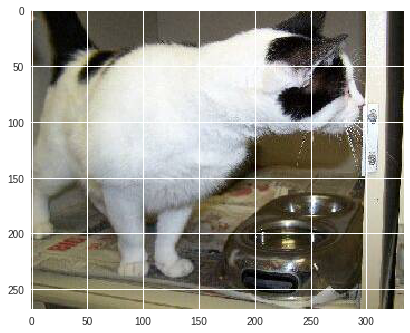

In [35]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [36]:
img.shape

(268, 334, 3)

In [0]:
img[:4,:4]

In [0]:
# Uncomment the below if you need to reset your precomputed activations
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [39]:
arch=models.resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

NameError: ignored

In [0]:
data = ImageDataBunch.from_folder(path, train='train',valid='valid', ds_tfms=get_transforms(), size=224)

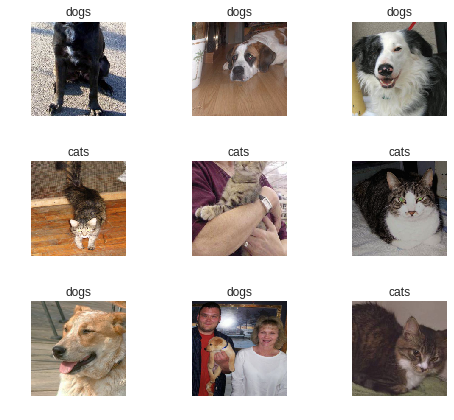

In [41]:
data.show_batch(rows=3, figsize=(7,6))

In [42]:
print(data.classes)
len(data.classes),data.c

['cats', 'dogs']


(2, 2)

In [43]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 105185893.88it/s]


In [44]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.072700,0.035264,0.013000
2,0.053118,0.026312,0.009500
3,0.039775,0.020086,0.006000
4,0.031533,0.018988,0.006000


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

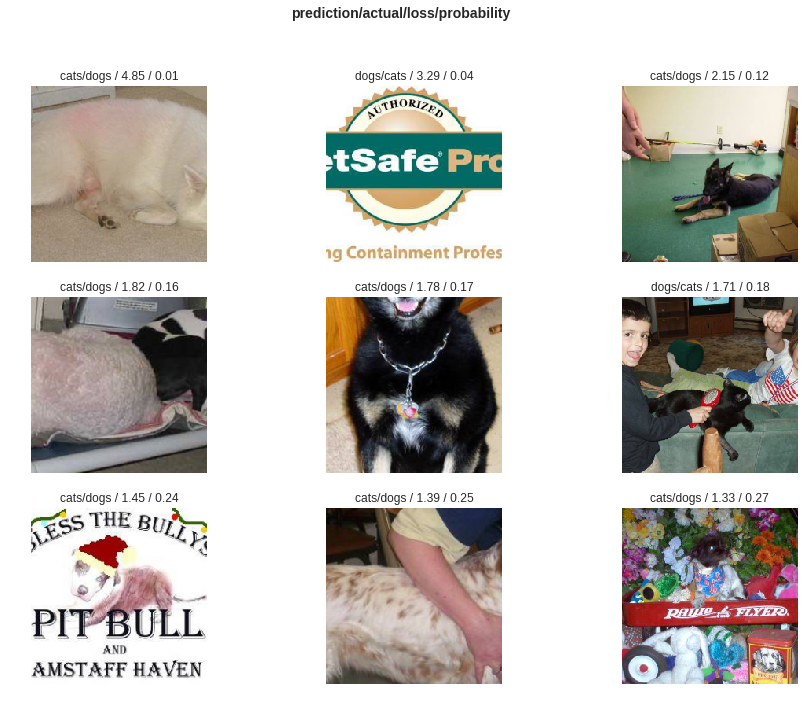

In [47]:
interp.plot_top_losses(9, figsize=(15,11)) # Prediction/ Actual/ Loss/ Probability

In [0]:
doc(interp.plot_top_losses)

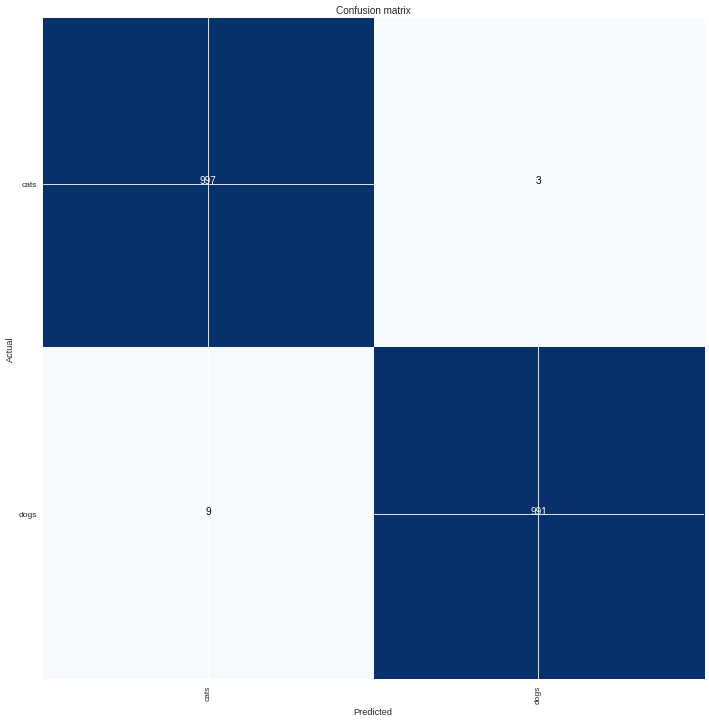

In [51]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [50]:
interp.most_confused(min_val=2)

[('dogs', 'cats', 9), ('cats', 'dogs', 3)]

In [0]:
learn.unfreeze()

In [53]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.090156,0.054053,0.022000
2,0.041593,0.028794,0.012000


In [0]:
learn.load('stage-1');

In [55]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


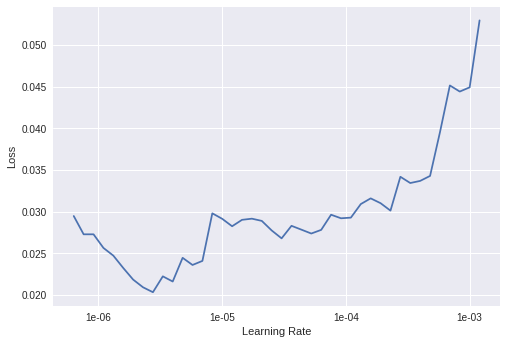

In [56]:
learn.recorder.plot()

In [60]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.013981,0.016211,0.005500
2,0.014716,0.016225,0.006000


In [0]:
learn.save('stage-2');